In [134]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
'''
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn import svm
'''
from sklearn.ensemble import RandomForestClassifier

In [103]:
import os
os.chdir('C:/Users/sgsgk/Documents/머신러닝 프로젝트 스터디/creditcart-overdue-prediction/open')

In [104]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
submission=pd.read_csv('sample_submission.csv')

In [105]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [106]:
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


In [107]:
train.shape

(26457, 20)

In [108]:
test.shape

(10000, 19)

In [109]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [110]:
# 1. 결측치 제거 -> 직업 유형
train = train.drop('occyp_type', axis=1)
test = test.drop('occyp_type', axis=1)
train.isnull().sum()
# occyp를 삭제해서 결측값이 존재하지 않음

index            0
gender           0
car              0
reality          0
child_num        0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
FLAG_MOBIL       0
work_phone       0
phone            0
email            0
family_size      0
begin_month      0
credit           0
dtype: int64

In [111]:
# 데이터의 요소의 개수 파악하기
unique_len = train.apply(lambda x : len(x.unique()))
unique_len

index            26457
gender               2
car                  2
reality              2
child_num            9
income_total       249
income_type          5
edu_type             5
family_type          5
house_type           6
DAYS_BIRTH        6621
DAYS_EMPLOYED     3470
FLAG_MOBIL           1
work_phone           2
phone                2
email                2
family_size         10
begin_month         61
credit               3
dtype: int64

In [112]:
g2 = unique_len[(unique_len>2) &(unique_len<=10)].index
print(g2)
print("-----")
g3 = unique_len[(unique_len>10)].index
print(g3)

Index(['child_num', 'income_type', 'edu_type', 'family_type', 'house_type',
       'family_size', 'credit'],
      dtype='object')
-----
Index(['index', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month'], dtype='object')


In [113]:
# 2. 이진 변수 숫자로 변환
train[g1]
# 데이터가 어떻게 생겼는 지 먼저 확인

,gender,car,reality,FLAG_MOBIL,work_phone,phone,email
0,F,N,N,1,0,0,0
1,F,N,Y,1,0,0,1
2,M,Y,Y,1,0,1,0
3,F,N,Y,1,0,1,0
4,F,Y,Y,1,0,0,0
...,...,...,...,...,...,...,...
26452,F,N,N,1,0,0,0
26453,F,N,Y,1,0,0,0
26454,F,Y,N,1,0,0,0
26455,M,N,Y,1,0,0,0


In [114]:
# 2. 이진 변수 숫자로 변환
train['gender'] = train['gender'].replace(['F','M'], [0,1])
test['gender'] = test['gender'].replace(['F','M'], [0,1])
print("gender, 성별:")
print(train['gender'].value_counts())
print("------------")

train['car'] = train['car'].replace(['N','Y'], [0,1])
test['car'] = test['car'].replace(['N','Y'], [0,1])
print("차량 소유 여부:")
print(train['car'].value_counts())
print("------------")

# 부동산 소유 여부
train['reality'] = train['reality'].replace(['N','Y'], [0,1])
test['reality'] = test['reality'].replace(['N','Y'], [0,1])
print("reality, 부동산 소유 여부:")
print(train['reality'].value_counts())
print("------------")

print('휴대폰 소유 여부:')
print(train['phone'].value_counts())
print("------------")

print('이메일 소유 여부:')
print(train['email'].value_counts())
print("------------")

print('업무용 전화 소유 여부:')
print(train['work_phone'].value_counts())
print("------------")

gender, 성별:
0    17697
1     8760
Name: gender, dtype: int64
------------
차량 소유 여부:
0    16410
1    10047
Name: car, dtype: int64
------------
reality, 부동산 소유 여부:
1    17830
0     8627
Name: reality, dtype: int64
------------
휴대폰 소유 여부:
0    18672
1     7785
Name: phone, dtype: int64
------------
이메일 소유 여부:
0    24042
1     2415
Name: email, dtype: int64
------------
업무용 전화 소유 여부:
0    20511
1     5946
Name: work_phone, dtype: int64
------------


In [115]:
# 3. 연속형 변수 처리하기
train[g2]

,child_num,income_type,edu_type,family_type,house_type,family_size,credit
0,0,Commercial associate,Higher education,Married,Municipal apartment,2.0,1.0
1,1,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,3.0,1.0
2,0,Working,Higher education,Married,House / apartment,2.0,2.0
3,0,Commercial associate,Secondary / secondary special,Married,House / apartment,2.0,0.0
4,0,State servant,Higher education,Married,House / apartment,2.0,2.0
...,...,...,...,...,...,...,...
26452,2,State servant,Secondary / secondary special,Married,House / apartment,4.0,1.0
26453,1,Working,Higher education,Separated,House / apartment,2.0,2.0
26454,0,Working,Secondary / secondary special,Civil marriage,With parents,2.0,2.0
26455,0,Working,Incomplete higher,Single / not married,House / apartment,1.0,2.0


<AxesSubplot:>

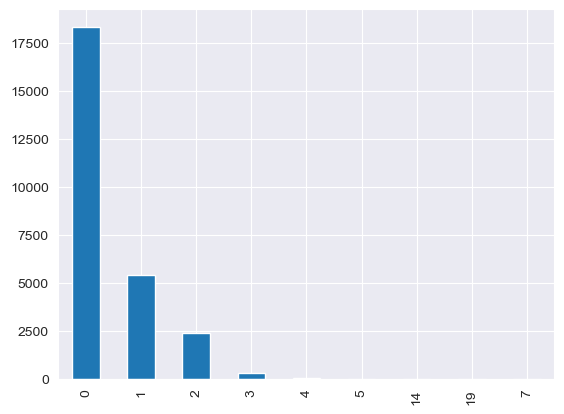

In [116]:
train['child_num'].value_counts(sort=False).plot.bar()

<AxesSubplot:>

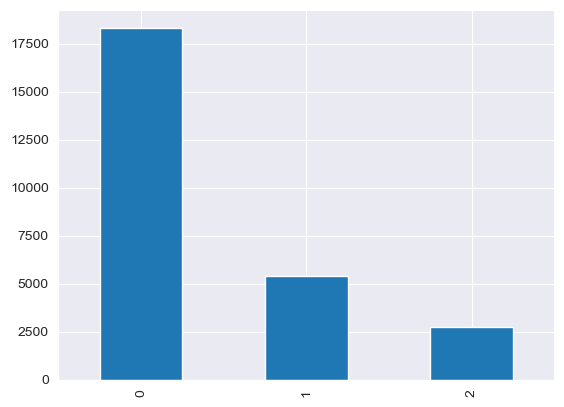

In [117]:
train.loc[train['child_num']>=2, 'child_num'] = 2 # 오른쪽은 칼럼 인덱스 넣어주기
test.loc[test['child_num']>=2, 'child_num'] = 2
# 2명 이상인 아이들의 수가 적기 때문에 2이상의 나이는 병합 해주기
train['child_num'].value_counts(sort=False).plot.bar()

In [118]:
train[g2].apply(lambda x : len(x.unique()))

child_num       3
income_type     5
edu_type        5
family_type     5
house_type      6
family_size    10
credit          3
dtype: int64

In [119]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train['income_type'] = label_encoder.fit_transform(train['income_type'])
test['income_type'] = label_encoder.fit_transform(test['income_type'])

train['edu_type']=label_encoder.fit_transform(train['edu_type'])
test['edu_type']=label_encoder.transform(test['edu_type'])

train['family_type']=label_encoder.fit_transform(train['family_type'])
test['family_type']=label_encoder.transform(test['family_type'])

train['house_type']=label_encoder.fit_transform(train['house_type'])
test['house_type']=label_encoder.transform(test['house_type'])

train['income_total']=label_encoder.fit_transform(train['income_total'])
test['income_total']=label_encoder.fit_transform(test['income_total'])

In [120]:
train[g3]

,index,income_total,DAYS_BIRTH,DAYS_EMPLOYED,begin_month
0,0,145,-13899,-4709,-6.0
1,1,165,-11380,-1540,-5.0
2,2,214,-19087,-4434,-22.0
3,3,145,-15088,-2092,-37.0
4,4,111,-15037,-2105,-26.0
...,...,...,...,...,...
26452,26452,156,-12079,-1984,-2.0
26453,26453,133,-15291,-2475,-47.0
26454,26454,181,-10082,-2015,-25.0
26455,26455,121,-10145,-107,-59.0


In [121]:
train[g3].apply(lambda x : len(x.unique()))

index            26457
income_total       249
DAYS_BIRTH        6621
DAYS_EMPLOYED     3470
begin_month         61
dtype: int64

In [122]:
import numpy as np
counts, bin_dividers = np.histogram(train['income_total'], bins=7) # 각 구간의 개수와 구간들의 분절점
train['income_total'] = pd.cut(train['income_total'],bins=bin_dividers, include_lowest=True, labels=np.arange(7))
# include_lowest = True -> 구간의 시작점도 포함

In [123]:
train['income_total']
# 요렇게 하면 형태가 category로 나오기 때문에 int로 바꿔줘야함

0        4
1        4
2        6
3        4
4        3
        ..
26452    4
26453    3
26454    5
26455    3
26456    1
Name: income_total, Length: 26457, dtype: category
Categories (7, int64): [0 < 1 < 2 < 3 < 4 < 5 < 6]

In [124]:
train['income_total'] = pd.factorize(pd.cut(train['income_total'],bins=bin_dividers, include_lowest=True, labels=np.arange(7)))[0]
test['income_total'] = pd.factorize(pd.cut(test['income_total'],bins=bin_dividers, include_lowest=True, labels=np.arange(7)))[0]

In [125]:
# 요렇게 구간화 함수 만들기
def make_bin(array, n):
    array = -array
    _, bin_dividers = np.histogram(array, bins=n)
    cut_categories = pd.cut(array, bin_dividers, labels=np.arange(n), include_lowest=True)
    bined_array = pd.factorize(cut_categories)[0]
    return bined_array

In [126]:
train['DAYS_BIRTH'] = make_bin(train['DAYS_BIRTH'], n=10)
train['DAYS_EMPLOYED'] = make_bin(train['DAYS_EMPLOYED'], n=6)
train['begin_month'] = make_bin(train['begin_month'], n=4)

test['DAYS_BIRTH'] = make_bin(test['DAYS_BIRTH'], n=10)
test['DAYS_EMPLOYED'] = make_bin(test['DAYS_EMPLOYED'], n=6)
test['begin_month'] = make_bin(test['begin_month'], n=4)

In [127]:
train

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,0,0,0,0,0,0,0,1,1,2,0,0,1,0,0,0,2.0,0,1.0
1,1,0,0,1,1,0,0,4,0,1,1,0,1,0,0,1,3.0,0,1.0
2,2,1,1,1,0,0,4,1,1,1,2,0,1,0,1,0,2.0,1,2.0
3,3,0,0,1,0,0,0,4,1,1,3,0,1,0,1,0,2.0,2,0.0
4,4,0,1,1,0,0,2,1,1,1,3,0,1,0,0,0,2.0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,0,0,2,0,2,4,1,1,1,0,1,0,0,0,4.0,0,1.0
26453,26453,0,0,1,1,0,4,1,2,1,3,0,1,0,0,0,2.0,3,2.0
26454,26454,0,1,0,0,0,4,4,0,5,5,0,1,0,0,0,2.0,1,2.0
26455,26455,1,0,1,0,0,4,2,3,1,5,0,1,0,0,0,1.0,3,2.0


In [128]:
train_x = train.drop('credit', axis=1)
train_y = train[['credit']]
test_x = test
print(train_x.shape, train_y.shape, test.shape)

(26457, 18) (26457, 1) (10000, 18)


In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import f1_score
# from tensorflow.keras.utils import to_categorical

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y,
                                                  stratify=train_y, test_size=0.25, random_state=42)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_val)

print(f"log_loss: {log_loss(y_val['credit'], y_pred)}")
# 값이 작을수록 잘 예측한 것임

log_loss: 1.0878858663397037
